In [1]:
from loader import Loader

data = {
    'jan': 'data/yellow_tripdata_2018-01.csv',
    'feb': 'data/yellow_tripdata_2018-02.csv',
    'mar': 'data/yellow_tripdata_2018-03.csv',
    'apr': 'data/yellow_tripdata_2018-04.csv',
    'may': 'data/yellow_tripdata_2018-05.csv',
    'jun': 'data/yellow_tripdata_2018-06.csv'
}

loader = Loader(csv=data['jan'], chunksize=10000)
cols = loader.get_columns()

print(cols)

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


In [6]:
import sys

jan_data = loader.iterate(usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count'])

# RQ2
processed = 0
h_slots = {str(x % 24) + '-' + str((x + 1) % 24): 0 for x in range(24)}
invalid = set()

for d in jan_data:
    for i in range(d.first_valid_index(), d.first_valid_index() + len(d)):
        start = d.loc[i]['tpep_pickup_datetime']
        end = d.loc[i]['tpep_dropoff_datetime']

        # debug
        # print(start + '/' + end)

        # getting only the hour as we're working with
        # hourly slot 
        h_start = int(start.split()[1].split(':')[0])
        h_end = int(end.split()[1].split(':')[0])

        # approximation of time slot
        h_end = h_end if h_start != h_end else (h_end + 1) % 24

        # time slot key
        slot_k = str(h_start) + '-' + str(h_end)

        # catch not valid entries...
        if slot_k not in h_slots:
            invalid.add((start, end))
            continue

        # increment counter for each matching key
        h_slots[slot_k] += d.loc[i]['passenger_count']
        processed += 1
            
    print('Processed: ' + str(processed))
    print('Invalid (discarded): ' + str(len(invalid)))

print(sorted(h_slots.items(), key=lambda kv: kv[1]))
# print('Processed: ' + str(processed))
# print('Invalid (discarded): ' + str(len(invalid)))

Processed: 9991
Invalid (discarded): 9
Processed: 19976
Invalid (discarded): 24
Processed: 29967
Invalid (discarded): 33
Processed: 39959
Invalid (discarded): 41
Processed: 49939
Invalid (discarded): 61
Processed: 59924
Invalid (discarded): 76
Processed: 69908
Invalid (discarded): 92
Processed: 79886
Invalid (discarded): 114
Processed: 89868
Invalid (discarded): 132
Processed: 99856
Invalid (discarded): 144
Processed: 109846
Invalid (discarded): 154
Processed: 119833
Invalid (discarded): 167
Processed: 129820
Invalid (discarded): 180
Processed: 139809
Invalid (discarded): 191
Processed: 149803
Invalid (discarded): 197
Processed: 159789
Invalid (discarded): 211
Processed: 169779
Invalid (discarded): 221
Processed: 179766
Invalid (discarded): 234
Processed: 189756
Invalid (discarded): 244
Processed: 199747
Invalid (discarded): 253
Processed: 209732
Invalid (discarded): 268
Processed: 219718
Invalid (discarded): 282
Processed: 229707
Invalid (discarded): 293
Processed: 239693
Invalid (dis

KeyboardInterrupt: 

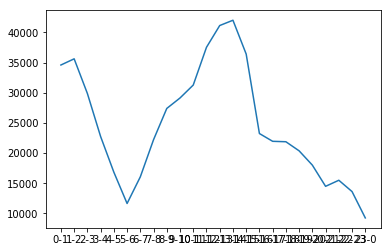

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(h_slots)), list(h_slots.values()))
plt.xticks(range(len(h_slots)), list(h_slots.keys()))

plt.show()